In [10]:
import pandas as pd
import matplotlib.pyplot as plt  
# Load dataset
df = pd.read_csv('../data/raw/data.csv')

# Show shape and preview
df.shape
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [2]:
# Data types and non-null counts
df.info()

# Summary stats for numerics
df.describe()

# Preview categorical columns
df.select_dtypes('object').nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
TransactionStartTime    94556
dtype: int64

In [3]:
# Missing value percentage
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0]  # Filter only those with missing

Series([], dtype: float64)

In [9]:
import pandas as pd
from ydata_profiling import ProfileReport
import pdfkit

# Define your DataFrame
data = {
    'column1': [1, 2, 3],
    'column2': [4, 5, 6],
}
df = pd.DataFrame(data)

# Create the profile report
profile = ProfileReport(df, title="EDA Report", explorative=True)

# Save the report as an HTML file
profile.to_file("eda_report.html")

# Add navigation links to the HTML report
with open("eda_report.html", "r") as file:
    content = file.read()

# Modify content to include internal navigation (anchors)
nav_links = """
<div>
    <a href="#overview">Overview</a> |
    <a href="#alerts">Alerts</a>
</div>
"""

# Insert the navigation links at the beginning of the content
content = nav_links + content

# Save the modified HTML content
with open("eda_report.html", "w") as file:
    file.write(content)

# Configure the path to wkhtmltopdf
config = pdfkit.configuration(wkhtmltopdf=r'C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe')

# Convert HTML to PDF
pdfkit.from_file("eda_report.html", "eda_report.pdf", configuration=config)

print("PDF report generated successfully.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 292.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

PDF report generated successfully.


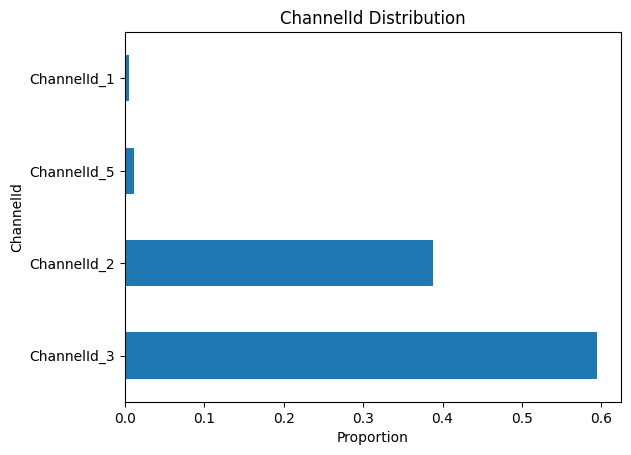

In [11]:
# Plotting the value counts for 'ChannelId'
df['ChannelId'].value_counts(normalize=True).plot(kind='barh')
plt.title('ChannelId Distribution')
plt.xlabel('Proportion')
plt.ylabel('ChannelId')
plt.show()

Text(0.5, 1.0, 'Transaction Amount Distribution')

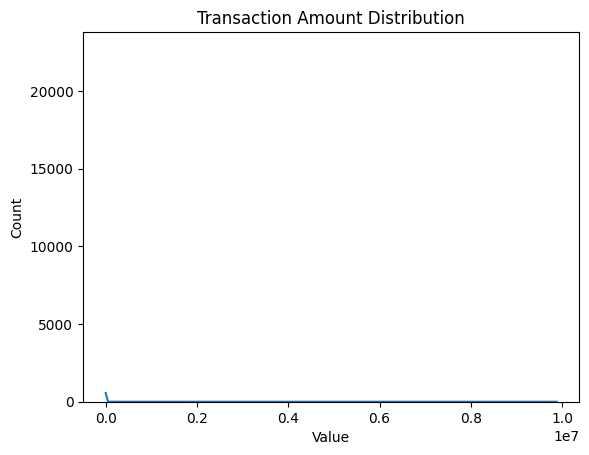

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example
sns.histplot(df['Value'], kde=True)
plt.title('Transaction Amount Distribution')

<Axes: xlabel='Value'>

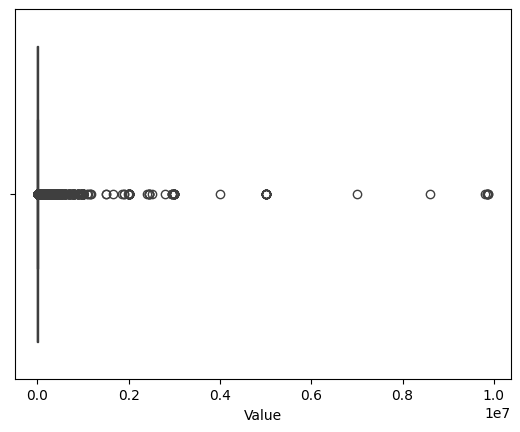

In [13]:
# Box plot
sns.boxplot(x=df['Value'])

<Axes: >

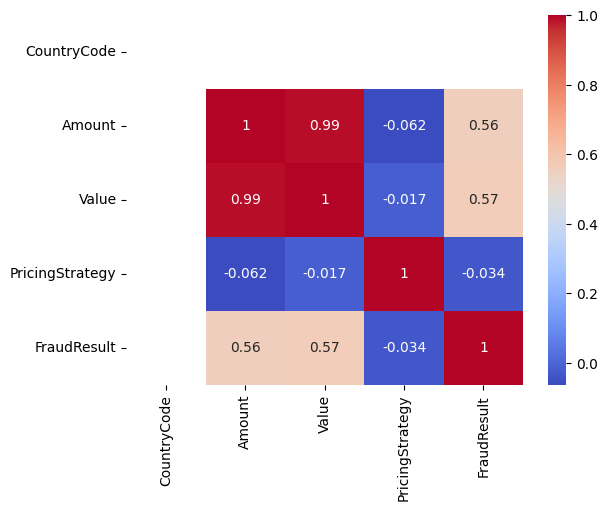

In [14]:
# Correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
### Key Insights:
1. Most transactions fall below 2000 in value; however, there are extreme outliers.
2. ChannelId is heavily skewed toward "web" and "pay later".
3. Several customers show inactivity (only 1 or 2 transactions).
4. Some ProductCategories dominate, e.g., "Airtime" and "Data Bundle".
5. No clear time-based trend, suggesting irregular customer behavior.